In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 🧪 Cluster 001: Cannabinoide Insights

_Datenexploration und Analyse der wichtigsten Cannabinoid-Werte aus dem Leafly Strain Dataset_

---

## Inhaltsverzeichnis

1. [Setup & Overview](#setup--overview)
2. [DataFrame Struktur](#dataframe-struktur)
3. [Deskriptive Statistik](#deskriptive-statistik)
4. [Visualisierung der Cannabinoide](#visualisierung-der-cannabinoide)
5. [Weitere Analysen & Ideen](#weitere-analysen--ideen)
6. [Fazit & To Dos](#fazit--to-dos)

---

> _Hinweis: Der DataFrame enthält bereits bereinigte und umbenannte Felder sowie den Strain-Namen für bessere Lesbarkeit._


---
## 1. Setup & Overview

- Dieses Notebook untersucht die wichtigsten Cannabinoid-Gehalte verschiedener Strains.
- Alle Werte sind vom 50. Perzentil und in %. <br/>
---


In [13]:
# import
df = pd.read_csv("../csv/strains.csv")
df = df.set_index("id").sort_values("id")

In [14]:
# cannabinoide-df
cb_df = df[
    [
        "name",
        "cannabinoid_thc_percentile50",
        "cannabinoid_cbd_percentile50",
        "cannabinoid_cbg_percentile50",
        "cannabinoid_thcv_percentile50",
        "cannabinoid_cbc_percentile50",
    ]
].rename(
    columns={
        "cannabinoid_thc_percentile50": "thc",
        "cannabinoid_cbd_percentile50": "cbd",
        "cannabinoid_cbg_percentile50": "cbg",
        "cannabinoid_thcv_percentile50": "thcv",
        "cannabinoid_cbc_percentile50": "cbc",
    }
)

---

## 2. DataFrame Struktur

*Kurzer Überblick über Spalten und Beispiel-Datensätze (z.B. via `df.head()` oder `df.info()`).*  
Liste der Felder:  
- name
- thc
- cbd
- cbg
- thcv
- cbc

---


In [15]:
cb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8492 entries, 1 to 518764
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    8492 non-null   object 
 1   thc     4248 non-null   float64
 2   cbd     3666 non-null   float64
 3   cbg     3638 non-null   float64
 4   thcv    3337 non-null   float64
 5   cbc     3078 non-null   float64
dtypes: float64(5), object(1)
memory usage: 464.4+ KB


In [18]:
cb_df.sort_values(by="id").head(7)

,name,thc,cbd,cbg,thcv,cbc
id,,,,,,
1,AK-47,19.0,0.0,0.0,0.0,0.0
2,Chemdawg,18.0,0.0,1.0,0.0,0.0
3,Mr. Nice Guy,17.0,0.0,0.0,0.0,0.0
6,Super Silver Haze,21.0,0.0,1.0,0.0,0.0
7,Northern Lights #5,19.0,0.0,1.0,0.0,0.0
8,Snowcap,19.0,0.0,2.0,0.0,0.0
9,Blue Cheese,18.0,0.0,1.0,0.0,0.0


---
## 3. Deskriptive Statistik

### Basisstatistik
- Übersicht
- Nullwerte, Max/Min, Verteilungen
- ggf. Korrelationen zwischen Cannabinoiden
---


In [ ]:
# Verteilung und Ranges
cb_df.describe()

,thc,cbd,cbg,thcv,cbc
count,4248.000000,3666.000000,3638.000000,3337.000000,3078.000000
mean,19.993870,0.255619,0.743815,0.015283,0.005523
std,4.662397,1.667764,0.613575,0.271675,0.086280
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,0.000000,1.000000,0.000000,0.000000
75%,23.000000,0.000000,1.000000,0.000000,0.000000
max,40.000000,18.000000,10.000000,13.000000,3.000000


In [27]:
# Nullwerte & Nicht-Null-Werte pro Spalte
print("Nicht-Null-Werte:\n", cb_df.count(), "\n\nNullwerte\n", cb_df.isnull().sum())

Nicht-Null-Werte:
 name    8492
thc     4248
cbd     3666
cbg     3638
thcv    3337
cbc     3078
dtype: int64 

Nullwerte
 name       0
thc     4244
cbd     4826
cbg     4854
thcv    5155
cbc     5414
dtype: int64


In [44]:
# Duplikate und eindeutige Werte
cb_df.duplicated().sum()
cb_df.nunique()

name    8486
thc       65
cbd       21
cbg        8
thcv       5
cbc        3
dtype: int64

In [32]:
# Korrelation aller numerischer Werte
cb_df.corr(numeric_only=True)

,thc,cbd,cbg,thcv,cbc
thc,1.000000,-0.484756,0.280755,-0.065289,-0.050273
cbd,-0.484756,1.000000,-0.086968,-0.010740,0.069825
cbg,0.280755,-0.086968,1.000000,-0.002413,-0.026231
thcv,-0.065289,-0.010740,-0.002413,1.000000,-0.005090
cbc,-0.050273,0.069825,-0.026231,-0.005090,1.000000


In [52]:
# Extremwerte/Ausreißer identifizieren
cb_df[cb_df["thc"] > cb_df["thc"].quantile(0.99)]
print("MAX:  \n", cb_df.idxmax(), "\nMIN:  \n", cb_df.idxmin())

MAX:  
 name    504333
thc     516800
cbd     503977
cbg     505400
thcv    516736
cbc     506432
dtype: int64 
MIN:  
 name    516532
thc      82033
cbd          1
cbg          1
thcv         1
cbc          1
dtype: int64


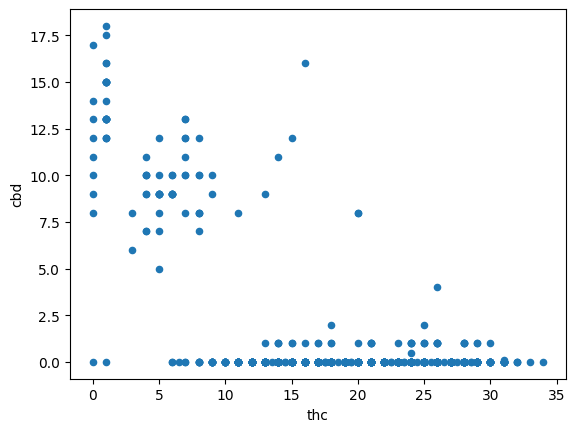

In [ ]:
# Mögliche Korrelation pruefen
cb_df[["thc", "cbd"]].plot.scatter(x="thc", y="cbd")
plt.show()

---
## 4. Visualisierung der Cannabinoide

- Histogramme (z.B. Verteilung von THC, CBD)
- Scatterplots (Vergleich THC vs. CBD, etc.)
- Pairplot/Correlation-Heatmap
---


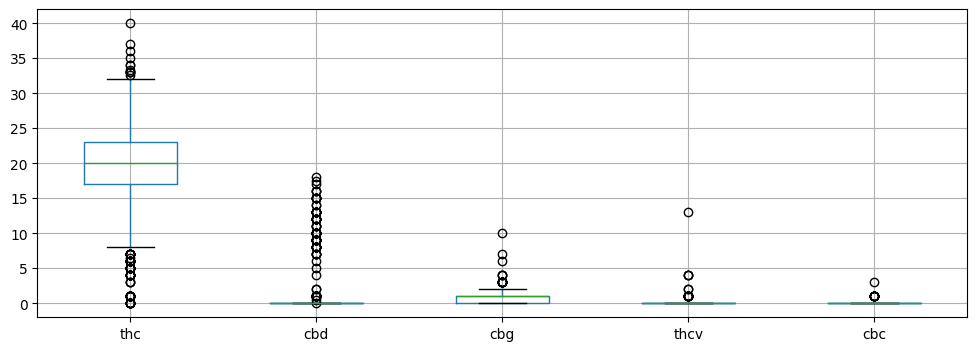

In [67]:
cb_df.boxplot(figsize=(12, 4))
plt.show()

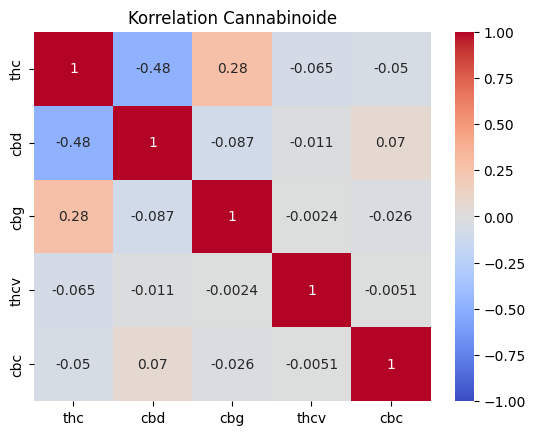

In [68]:
sns.heatmap(cb_df.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-1.0)
plt.title("Korrelation Cannabinoide")
plt.show()

---

## 5. Weitere Analysen & Ideen

*Platz für Insights, Ausreißer, Cluster, spannende Strains…*  
- Welche Strains sind besonders reich an seltenen Cannabinoiden?
- Gibt es Strains mit ungewöhnlichen Profilen?
- Wie unterscheiden sich Medianwerte nach Kategorie (wenn verfügbar)?

---


---
## 6. Fazit & To Dos

- Zusammenfassung der wichtigsten Erkenntnisse
- Offene Fragen & nächste Schritte
- Was könnte in weiteren Notebooks (z.B. Terpene, Effekte) angeschaut werden?
---
